<span style="font-size:large;">
<div style="text-align: right">CSTS-UH 1078 <b>Networks</b><br/>
Student name: <span style="color:blue"><b>Sashank Silwal</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 8</span>
# <span style="color:green">Networks among Songs and Albums

In [2]:
# !pip install thecypher
import thecypher as cy
import pandas as pd
# import resource
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
import warnings
warnings.filterwarnings('ignore')
# print resource.getrlimit(resource.RLIMIT_STACK)
# print sys.getrecursionlimit()
# max_rec = 0x100000
# # resource.setrlimit(resource.RLIMIT_STACK, [0x100 * max_rec, resource.RLIM_INFINITY])
# sys.setrecursionlimit(max_rec)

**Select a band having less than 30 albums!**

In [8]:
# REPLACE 'Metallica' WITH YOUR OWN MUSICIAN OR BAND!
# Each one should have a different musician or band. Therefore coordinate yourselves!
band='Maroon5'
songs = cy.get_lyrics('Maroon5')
print len(songs)
songs[0]

2019-10-10 14:20:31,331 : INFO : GET Artist URL: http://lyrics.fandom.com/wiki/Maroon_5
2019-10-10 14:20:32,424 : INFO : GET Artist Album: It Won't Be Soon Before Long (2007)
2019-10-10 14:20:49,266 : INFO : GET Artist Album Successful: It Won't Be Soon Before Long (2007)
2019-10-10 14:20:49,267 : INFO : GET Artist Album: Misc (0000)
2019-10-10 14:20:49,269 : INFO : GET Artist Album Successful: Misc (0000)
2019-10-10 14:20:49,270 : INFO : GET Artist Album: Songs About Jane (2002)
2019-10-10 14:21:08,072 : INFO : GET Artist Album Successful: Songs About Jane (2002)
2019-10-10 14:21:08,073 : INFO : GET Artist Album: 1.22.03 Acoustic (2004)
2019-10-10 14:21:11,091 : INFO : GET Artist Album Successful: 1.22.03 Acoustic (2004)
2019-10-10 14:21:11,092 : INFO : GET Artist Album: The B-Side Collection (2007)
2019-10-10 14:21:13,281 : INFO : GET Artist Album Successful: The B-Side Collection (2007)
2019-10-10 14:21:13,282 : INFO : GET Artist Album: Overexposed (2012)
2019-10-10 14:21:29,477 : I

6624


{'album': u"It Won't Be Soon Before Long (2007)",
 'album_genre': '',
 'artist': 'Maroon5',
 'genre': '',
 'id': 18461L,
 'lyric': u"You're such a flirt, I know you hurt",
 'song': u'Kiwi',
 'year': u'2007'}

In [9]:
sdf = pd.DataFrame(songs)
group = ['song', 'year', 'album', 'genre', 'artist']
ldf = sdf.sort_values(group)\
       .groupby(group).lyric\
       .apply(' '.join)\
       .reset_index(name='lyric')
print len(ldf) 
ldf.rename(columns={'album': 'albumy'}, inplace=True)
ldf.columns
alb=[]
for i in range(len(ldf)):
    alb.append(ldf.iloc[i]['albumy'][:-7])
ldf['album']=alb
# ldf=ldf.drop('albumy', axis=1)
ldf=ldf.drop('genre', axis=1)
ldf=ldf.drop('artist', axis=1)
ldf=ldf[["song","album","year","albumy","lyric"]]
ldf

148


,song,album,year,albumy,lyric
0,A Day in the Life (Out-take),Stagg Street Recordings,1999,Stagg Street Recordings (1999),"(Laugh) Alright... I read the news today, oh..."
1,Animals,V,2014,V (2014),"Baby, I'm preying on you tonight Hunt you down..."
2,As Things Collide,Stagg Street Recordings,1999,Stagg Street Recordings (1999),You have this way of dipping in and out of sig...
3,Back at Your Door,It Won't Be Soon Before Long,2007,It Won't Be Soon Before Long (2007),From the moment the lights went off Everything...
4,Beautiful Goodbye,Overexposed,2012,Overexposed (2012),I count the ways I let you down On my fingers ...
5,Best 4 You,Red Pill Blues,2017,Red Pill Blues (2017),I just want the best for you Yeah another nigh...
6,Bet My Heart,Red Pill Blues,2017,Red Pill Blues (2017),"It's not time for conversation, no I don't wan..."
7,Better That We Break,It Won't Be Soon Before Long,2007,It Won't Be Soon Before Long (2007),I never knew perfection till I heard you speak...
8,Buddy Two-Shoes Wilson,The Fourth World,1997,The Fourth World (1997),Have you seen Buddy Two Shoes Wilson He comes ...
9,Can't Stop,It Won't Be Soon Before Long,2007,It Won't Be Soon Before Long (2007),"1, 2, 3, 4! All alone in my room Think of you ..."


In [10]:
lg=ldf["song"].groupby(ldf["albumy"]).count()
lg=lg.reset_index()
lg.rename(columns={'song': 'number of songs'}, inplace=True)
lg

,albumy,number of songs
0,1.22.03 Acoustic (2004),7
1,Hands All Over (2010),16
2,It Won't Be Soon Before Long (2007),18
3,Live - Friday The 13th (2005),14
4,Overexposed (2012),16
5,Red Pill Blues (2017),15
6,Songs About Jane (2002),18
7,Stagg Street Recordings (1999),10
8,The B-Side Collection (2007),7
9,The Fourth World (1997),12


In [11]:
albums=list(set(ldf.album.values))
year=[]
no_songs=[]
for a in albums:
    no_songs.append(len(list(set(ldf.loc[ldf['album']==a]['song'].values))))
    year.append(list(set(ldf.loc[ldf['album']==a]['year'].values))[0])
    y=' '.join(list(set(ldf.loc[ldf['album']==a]['year'].values)))
    c=[]
album = albums
lgy = pd.DataFrame(
    {'album': album,
     'year': year,
     'number of songs': no_songs
    })
lgy=lgy[["album",'year','number of songs']]
lgy.sort_values('year')

,album,year,number of songs
2,The Fourth World,1997,12
3,Stagg Street Recordings,1999,10
10,Songs About Jane,2002,18
4,1.22.03 Acoustic,2004,7
9,Live - Friday The 13th,2005,14
6,The B-Side Collection,2007,7
7,It Won't Be Soon Before Long,2007,18
5,Hands All Over,2010,16
0,Overexposed,2012,16
8,V,2014,15


### 1. The bipartite graph of songs and albums

In [12]:
sae=[]
for i in range(len(ldf)):
    s=ldf.iloc[i]['song']
    a=ldf.iloc[i]['album']
    y=ldf.iloc[i]['year']
    ly=ldf.iloc[i]['lyric']
    sae.append((s,a,y,ly))
saed=[]
for t in sae:
    year_l={'year_l':(t[2],t[3])}
    if t[0] not in ldf.album.unique():
        saed.append((t[0],t[1],year_l)) #,lyric))
    else:
        saed.append((t[0]+"_song",t[1],year_l))
saed=sorted(saed)
albums=list(set(ldf.album.values))
# songs=set(ldf.song.values)
t1=[]
t11=[]
t2=[]
for a in albums:
    for s in ldf.song.unique():
        if s==a:
            t11.append(s)
            ss=s+"_song"
            if ss not in t1:
                t1.append(ss)
for s in ldf.song.unique():
     if s not in t11:
        t2.append(s)
songs=t1+t2
for i in songs:
    if i in albums:
        print i
H=nx.MultiGraph()
H.add_edges_from(saed)
print "The graph H connecting the %i songs to the %i albums has: \n %i nodes and %i edges" %(len(songs),len(albums),len(H.nodes()),len(H.edges()))
print "Is H multigraph?", H.is_multigraph()
print "Is H bipartite?", nx.is_bipartite(H)

The graph H connecting the 123 songs to the 11 albums has: 
 134 nodes and 148 edges
Is H multigraph? True
Is H bipartite? True


In [7]:
# H.edges(data=True)

In [13]:
pos = nx.spring_layout(H, k=15.,iterations=1000)
r=0.3 #26
Ga=nx.Graph()
Ga.add_nodes_from(albums)
posalb=nx.circular_layout(Ga)
for a in albums:
    pos[a]=(r*posalb[a][0],r*posalb[a][1])

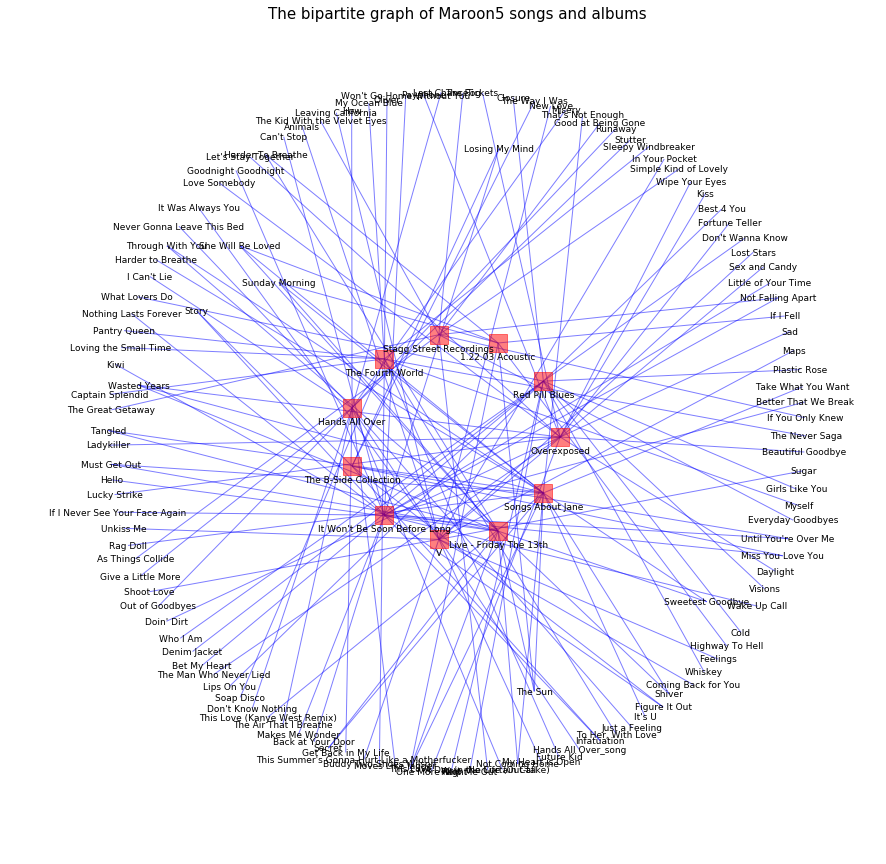

In [14]:
figsize=(15,15)

plt.figure(figsize=figsize);
nodes1 = nx.draw_networkx_nodes(H, pos, nodelist=list(albums),node_color="r",node_shape='s',alpha=0.5)#"#ffb3b3"
nodes2 = nx.draw_networkx_nodes(H, pos, nodelist=list(songs),node_size=0,node_color="g",node_shape='o',alpha=0.5)#"#b3ffb3"
nx.draw_networkx_edges(H, pos, edge_color="b", alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.04  # offset on the y axis
for k, v in pos.items():
    if k in albums:
        yoffset[k] = (v[0], v[1]+y_off)
    else:
        yoffset[k] = v
nx.draw_networkx_labels(H, yoffset,font_size=9);
sst="The bipartite graph of %s songs and albums" %band
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### 2. The intersection graph of albums in the songs that they contain

In [15]:
aed=[]
for a1 in albums:
    for a2 in albums:
        if a2!=a1:
            t=[]
            for s in songs:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print "The graph HA connecting albums containing common songs has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges()))
print "Is HA weighted?", nx.is_weighted(HA)

The graph HA connecting albums containing common songs has: 
 7 nodes and 7 edges
Is HA weighted? True


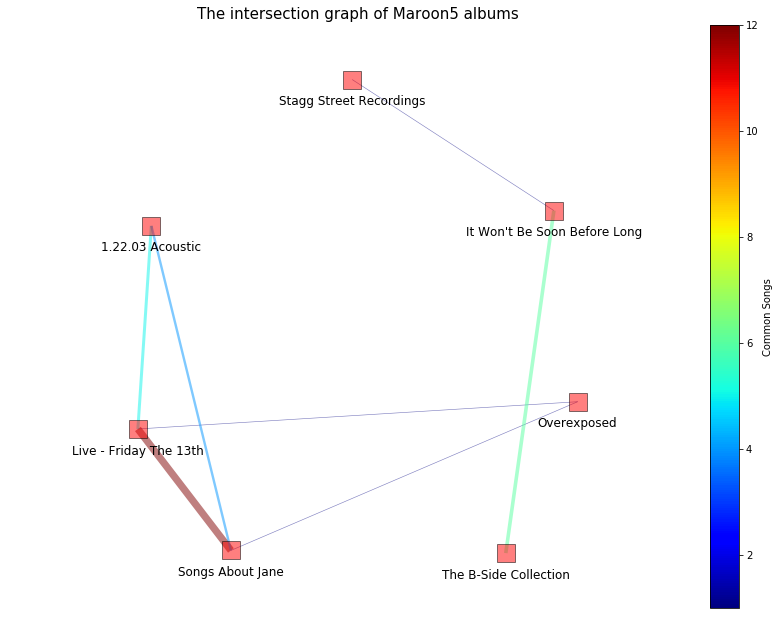

In [16]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[0.6*w for w in weight_list] # [math.log(1+w) for w in weight_list]

plt.figure(figsize=(10,7));
pos = nx.spring_layout(HA, k=15, iterations=200) #graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
# nx.draw_networkx_edge_labels(HA,pos=pos,edge_labels=weight);
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Common Songs") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The intersection graph of %s albums" %band
plt.title(sst,fontsize=15);
plt.margins(x=0.2, y=0.1) 

### 3. The graph of co-occurring songs in the albums

In [17]:
aed=[]
for a1 in songs:
    for a2 in songs:
        if a2!=a1:
            t=[]
            for s in albums:
                if ((s,a1) in H.edges() and (s,a2) in H.edges()) or ((a1,s) in H.edges() and (a2,s) in H.edges()):
                    t.append(s)
            if len(t)>0:
                aed.append((a1, a2, len(t)))
waed=[]
for t in aed:
    weight={'weight':t[2]}
    waed.append((t[0],t[1],weight))
waed=sorted(waed)
HA=nx.Graph()
HA.add_edges_from(waed)
print "The graph HA connecting songs co-occurring in albums has: \n %i nodes and %i edges" %(len(HA.nodes()),len(HA.edges()))
print "Is HA weighted?", nx.is_weighted(HA)

The graph HA connecting songs co-occurring in albums has: 
 123 nodes and 909 edges
Is HA weighted? True


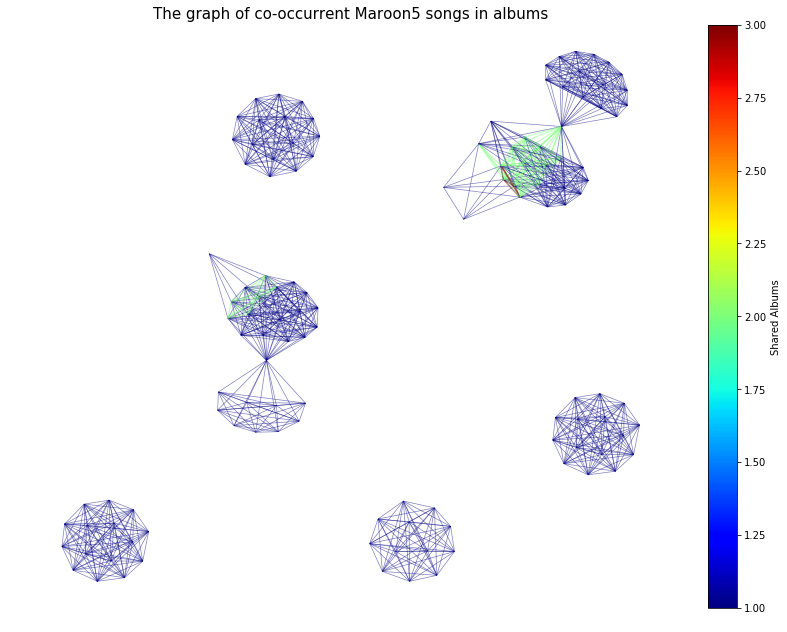

In [18]:
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

plt.figure(figsize=(10,7));
pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The graph of co-occurrent %s songs in albums" %band
plt.title(sst,fontsize=15);

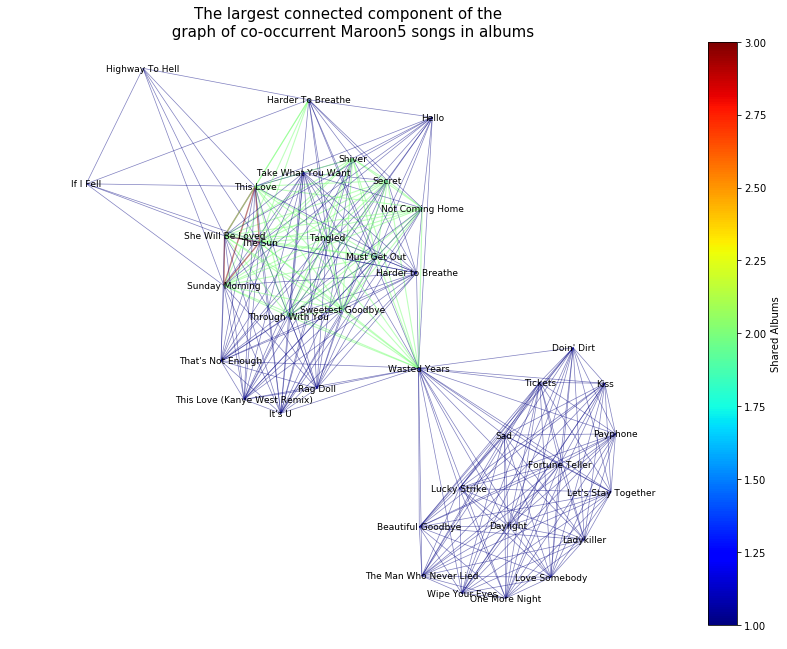

In [19]:
giant = max(nx.connected_component_subgraphs(HA), key=len)
plt.figure(figsize=(10,7));
HA=giant
weight=nx.get_edge_attributes(HA,'weight')
weight_list = [ e[2]['weight'] for e in HA.edges(data=True) ]
weight_list

cmap=plt.cm.jet #BrBG #ocean #coolwarm #plt.cm.tab20b
edge_color=weight_list
vmin = min(edge_color) 
vmax = max(edge_color) 
width_list=[math.log(1+w) for w in weight_list] # [0.6*w for w in weight_list]

pos=graphviz_layout(HA)
node_border_color='k'
nodes = nx.draw_networkx_nodes(HA, pos=pos,node_size=0,node_shape='s', node_color='r', alpha=0.5) #'#A0CBE2')
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(HA, pos=pos,width=width_list,edge_color=weight_list,edge_cmap=cmap,vmin=vmin, vmax=vmax,alpha=0.5)
plt.axis('off');
yoffset = {}
y_off = -0.08  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(HA, yoffset,font_size=9,);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Shared Albums") #, orientation='horizontal')
plt.tight_layout(-5)
sst="The largest connected component of the \n graph of co-occurrent %s songs in albums" %band
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.05) 